# Implementing image denoising on MNIST dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Sequential
from keras.datasets import mnist

#visualise images
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2

### Downloading MNIST dataset 

In [3]:
def load_mnist():
  (x_train, _), (x_test, _) = mnist.load_data() # https://keras.io/datasets
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
  x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

  return x_train, x_test

### View image data

In [18]:
# Plotting data
def viewMNIST(MNIST):
  plt.figure(figsize=(20,4))
  for i in range(1, 6, 1):
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(MNIST[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

### Adding noise to images

In [9]:
# Method to add gaussian noise to our training data set
def addNoise(img):
  noise_factor = 0.5
  x_train_noisy = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
  x_train_noisy = np.clip(x_train_noisy, 0., 1.)
  return x_train_noisy


### Lets define our model and train it to denoise

In [10]:
def initialiseModel():
    model = Sequential()
    # Building Encoder-Decoder model 
    # Encoder network
    model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
    model.add(MaxPooling2D(2, padding= 'same'))
    model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
    model.add(MaxPooling2D(2, padding= 'same'))
    # Decoder network
    model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
    model.add(UpSampling2D(2))
    model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
    model.add(UpSampling2D(2))
    model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) 
    # Output layer
    model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
    return model

# Training our model on noisy version of MNIST data
def trainModel(model, x_train, x_train_noisy, x_test, x_test_noisy):
    model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))
    return model
  
# Reconstructing MNIST data
def reconstructImgs(model, x_test_noisy):
    reconstruction = model.predict(x_test_noisy)
    # Display reconstructed images
    print("Reconstructed images")
    viewMNIST(reconstruction)

*main method*

In [11]:
def main():

  # Download MNIST data
  x_train, x_test = load_mnist()

  # plotting original mnist data
  print("\nExample MNIST data")
  viewMNIST(x_train)

  x_train_noisy = addNoise(x_train)
  x_test_noisy = addNoise(x_test)

  # plotting noisy version of mnist data, 
  print("\nNoisy version of example MNIST data")
  viewMNIST(x_train_noisy)

  # Display noisy images before  
  print("\nTest images with noise")
  viewMNIST(x_test_noisy)

  model = initialiseModel()
  model = trainModel(model, x_train, x_train_noisy, x_test, x_test_noisy)
  reconstructImgs(model, x_test_noisy)


*Calling main*


Example MNIST data


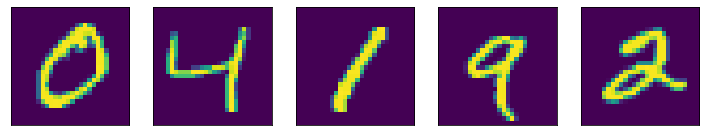


Noisy version of example MNIST data


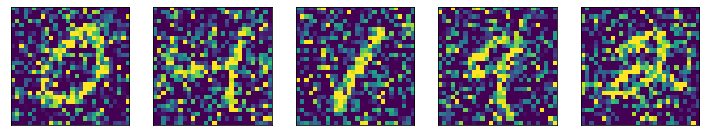


Test images with noise


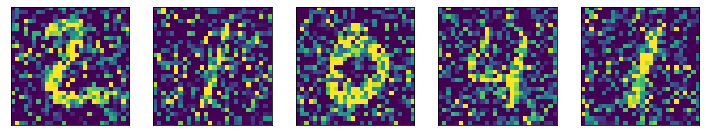

Epoch 1/15
469/469 [==============================] - 171s 363ms/step - loss: 0.1692 - val_loss: 0.1177
Epoch 2/15
469/469 [==============================] - 167s 356ms/step - loss: 0.1143 - val_loss: 0.1102
Epoch 3/15
469/469 [==============================] - 167s 356ms/step - loss: 0.1085 - val_loss: 0.1059
Epoch 4/15
469/469 [==============================] - 168s 358ms/step - loss: 0.1055 - val_loss: 0.1037
Epoch 5/15
469/469 [==============================] - 166s 354ms/step - loss: 0.1035 - val_loss: 0.1017
Epoch 6/15
469/469 [==============================] - 167s 356ms/step - loss: 0.1022 - val_loss: 0.1012
Epoch 7/15
469/469 [==============================] - 166s 354ms/step - loss: 0.1013 - val_loss: 0.0998
Epoch 8/15
469/469 [==============================] - 166s 353ms/step - loss: 0.1005 - val_loss: 0.0993
Epoch 9/15
469/469 [==============================] - 166s 353ms/step - loss: 0.0998 - val_loss: 0.0993
Epoch 10/15
469/469 [==============================] - 164s 350m

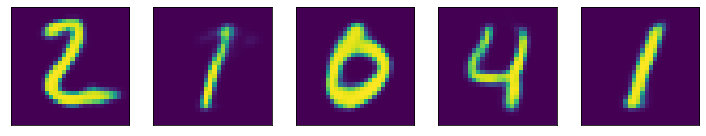

In [19]:
main()